<AxesSubplot:>

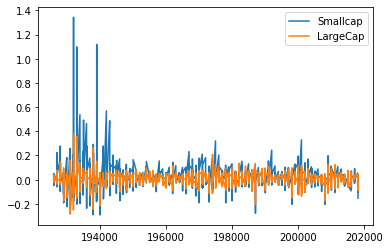

In [2]:
import pandas as pd
me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                  header=0, index_col=0, parse_dates=True, na_values=-99.99)
rets = me_m[['Lo 10', 'Hi 10']]
rets.columns = ['Smallcap','LargeCap']
rets = rets/100
rets.plot.line()

In [3]:
rets.index = pd.to_datetime(rets.index, format="%Y%m")

In [4]:
rets.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [5]:
rets.index = rets.index.to_period('M') #Change yyyymmdd to monthly period
rets.head()

,Smallcap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [6]:
rets["1975"] #select data by year

,Smallcap,LargeCap
1975-01,0.3202,0.1286
1975-02,0.0657,0.0613
1975-03,0.0989,0.0414
1975-04,0.0288,0.0531
1975-05,0.0811,0.0610
1975-06,0.0779,0.0524
1975-07,0.0218,-0.0703
1975-08,-0.0525,-0.0177
1975-09,-0.0351,-0.0468
1975-10,-0.0009,0.0620


In [7]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Smallcap  1110 non-null   float64
 1   LargeCap  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


# Compute Drawdowns
1. Compute a wealth index
2. Compute previous peaks
3. compute Drawndown (Wealth Values as a percentage of the previous peak)

In [8]:
wealth_index = 1000*(1+rets["LargeCap"]).cumprod()

In [9]:
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

<AxesSubplot:>

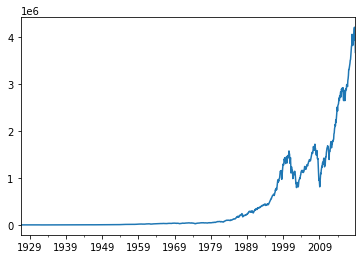

In [10]:
wealth_index.plot.line()

<AxesSubplot:>

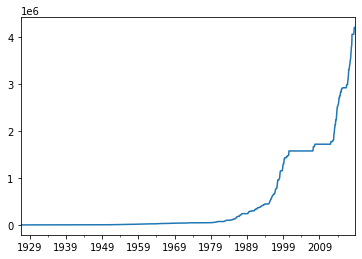

In [11]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot()

<AxesSubplot:>

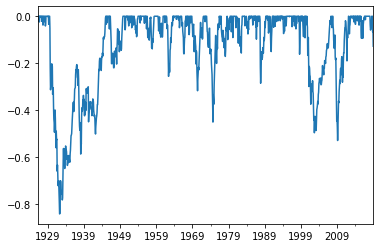

In [12]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot() #1929 - People lost 80% of their wealth

In [13]:
drawdown.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: LargeCap, dtype: float64

In [14]:
drawdown.min() #1929 - People lost 80% of their wealth

-0.8400375277943123

In [15]:
drawdown['1975':].min() #max drawdown since 1975

-0.5280945042309304

In [16]:
drawdown['1975':].idxmin()

Period('2009-02', 'M')

In [17]:
drawdown.idxmin()

Period('1932-05', 'M')

In [18]:
def drawdown(return_series: pd.Series):
    """
    Takes a time series of asset returns
    Computes and returns a DataFrame that contains:
    the wealth index
    the previous peaks
    percentage drawdowns
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({
        "Wealth" : wealth_index,
        "Peaks"  : previous_peaks,
        "Drawdown" : drawdowns
    })
    

In [19]:
drawdown(rets["LargeCap"]).head()

,Wealth,Peaks,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


In [20]:
drawdown(rets["LargeCap"])[["Wealth","Peaks"]].head()

,Wealth,Peaks
1926-07,1032.900000,1032.900000
1926-08,1071.117300,1071.117300
1926-09,1078.293786,1078.293786
1926-10,1052.091247,1078.293786
1926-11,1080.497711,1080.497711


<AxesSubplot:>

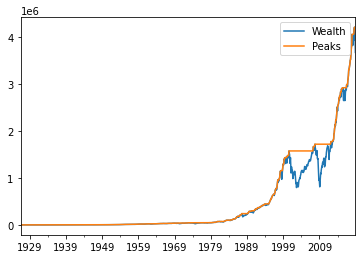

In [25]:
%matplotlib inline
drawdown(rets["LargeCap"])[["Wealth","Peaks"]].plot()

<AxesSubplot:>

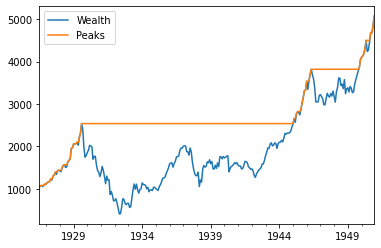

In [26]:
drawdown(rets[:"1950"]["LargeCap"])[["Wealth","Peaks"]].plot()

In [27]:
drawdown(rets["LargeCap"])["Drawdown"].min()

-0.8400375277943123

In [29]:
drawdown(rets["Smallcap"])["Drawdown"].min()

-0.8330007793945303

In [31]:
drawdown(rets["Smallcap"])["Drawdown"].idxmin()

Period('1932-05', 'M')

In [32]:
drawdown(rets["LargeCap"])["Drawdown"].idxmin()

Period('1932-05', 'M')

In [33]:
drawdown(rets["1940":]["Smallcap"])["Drawdown"].idxmin()

Period('1974-12', 'M')